<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/28_open_source_ML_Model_CUSTOM_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import torch
from torch import nn

# Note we need pytorch 1.10.0


In [136]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [137]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [138]:
# Getting a data, my dataset is a subset of food 101 dataset
# Our dataset starts with 3 classes of dood, and only 10% of the images, and 1000 images per class

In [139]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image dfolder does not exis, doewnload and prepare it
if image_path.is_dir():
  print(f"{image_path} already exists, skipping download")
else:
  print(f"{image_path} does not exists create new new one")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data...")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi dataa")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi already exists, skipping download


In [140]:
data_path / "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

In [141]:
import os
def walk_through_dir(dir_path):
  """ Walks per dir path, returning it is contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    # For each directory in directory
    print(f"There are {len(dirnames)} directorries and {len(filenames)} images in {dirpath} .")

In [142]:
walk_through_dir(image_path)

There are 2 directorries and 0 images in data/pizza_steak_sushi .
There are 3 directorries and 0 images in data/pizza_steak_sushi/train .
There are 0 directorries and 75 images in data/pizza_steak_sushi/train/steak .
There are 0 directorries and 78 images in data/pizza_steak_sushi/train/pizza .
There are 0 directorries and 72 images in data/pizza_steak_sushi/train/sushi .
There are 3 directorries and 0 images in data/pizza_steak_sushi/test .
There are 0 directorries and 19 images in data/pizza_steak_sushi/test/steak .
There are 0 directorries and 25 images in data/pizza_steak_sushi/test/pizza .
There are 0 directorries and 31 images in data/pizza_steak_sushi/test/sushi .


In [143]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

steak
Rnadom image path data/pizza_steak_sushi/train/steak/1839481.jpg
Image class: steak
Image height: 512
Image width: 512


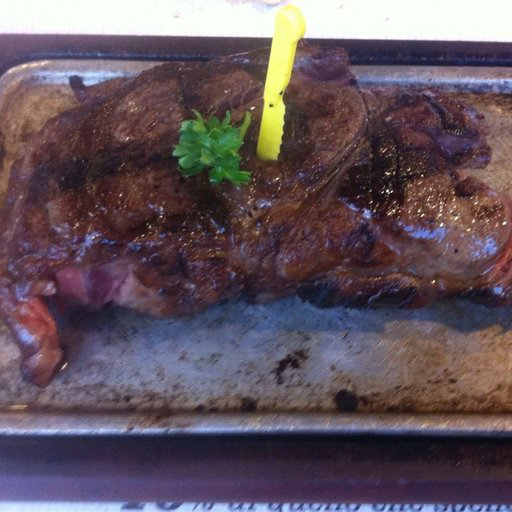

In [144]:
import random
from PIL import Image

random.seed(42)

# Get all image paths
# We want every single path image
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Selelct the random image, and show it here
random_image_path = random.choice(image_path_list)
random_image_path

# Get image class from path name (the image class in the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# Open the image with pil

img = Image.open(random_image_path)

# Print metadata
print(f"Rnadom image path {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

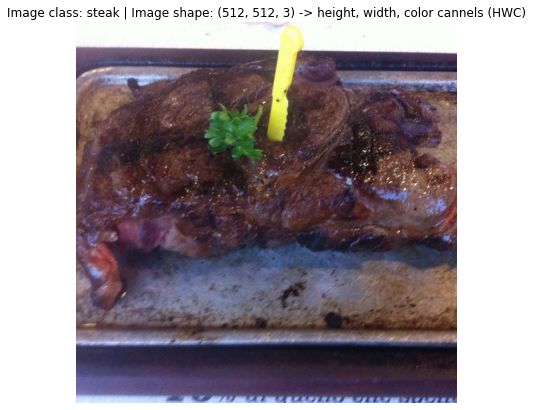

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into the array
img_as_array = np.asarray(img)

# Plot the image with matplot lib 
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> height, width, color cannels (HWC)")
plt.axis(False)

In [146]:
img_as_array

array([[[249, 254, 248],
        [249, 254, 248],
        [250, 255, 249],
        ...,
        [250, 255, 249],
        [250, 255, 249],
        [250, 255, 249]],

       [[249, 254, 248],
        [249, 254, 248],
        [250, 255, 249],
        ...,
        [250, 255, 249],
        [250, 255, 249],
        [250, 255, 249]],

       [[249, 254, 248],
        [249, 254, 248],
        [250, 255, 249],
        ...,
        [250, 255, 249],
        [250, 255, 249],
        [250, 255, 249]],

       ...,

       [[200, 222, 243],
        [204, 225, 246],
        [208, 229, 250],
        ...,
        [ 87, 108, 165],
        [ 93, 114, 171],
        [ 97, 116, 172]],

       [[205, 226, 247],
        [208, 229, 250],
        [211, 232, 253],
        ...,
        [ 92, 114, 172],
        [ 87, 108, 165],
        [ 85, 106, 161]],

       [[212, 233, 254],
        [215, 236, 255],
        [219, 237, 255],
        ...,
        [105, 127, 185],
        [ 99, 120, 177],
        [100, 121, 176]]

In [147]:
# Transforming the data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming data with torch vision transforms
data_transform = transforms.Compose([
    # Resize the images to 64X64
    transforms.Resize(size=(64, 64)),
    # Flip the image randomly horrizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch tensor
    transforms.ToTensor()
])

In [148]:
data_transform(img)

tensor([[[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9765, 0.9765],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9765],
         ...,
         [0.2314, 0.2235, 0.2275,  ..., 0.4157, 0.4314, 0.4471],
         [0.2549, 0.2510, 0.2549,  ..., 0.5412, 0.5529, 0.5647],
         [0.3569, 0.3647, 0.3804,  ..., 0.7804, 0.8000, 0.7843]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9882],
         ...,
         [0.1451, 0.1451, 0.1490,  ..., 0.4000, 0.4118, 0.4157],
         [0.1922, 0.2000, 0.2039,  ..., 0.5608, 0.5725, 0.5765],
         [0.4078, 0.4118, 0.4196,  ..., 0.8627, 0.8745, 0.8627]],

        [[0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9725, 0.9725],
         [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
         [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9804, 0.

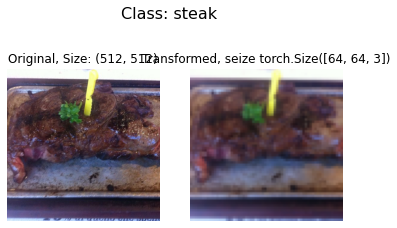

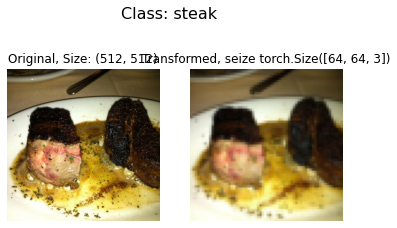

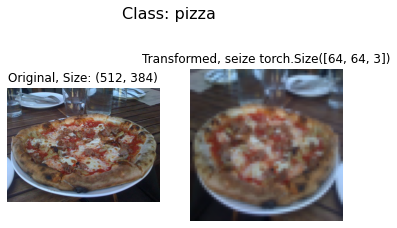

In [149]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """ Selects the random images from a path of images, and loads/transforms then plots the original versus transformed version"""
  if seed:
    random.seed(seed) 
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original, Size: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      # permute changes the C, H, W to H, W, C
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change the shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed, seize {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

In [150]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/339891.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/830007.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3518960.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1966300.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('data

In [151]:
# Loading image data using image folder
# Use image folder to create datasets
from torchvision import datasets
# The image will have the folder name
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None) #transform for the data, transform for the label
# We do not need to transform the labels as well
# for the test data
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [152]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [153]:
# Get classnames as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [154]:
# Get classnames as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [155]:
# Check the lengs of out dataset
len(train_data), len(test_data)

(225, 75)

In [156]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [157]:
# Index on the train_data dataset to get a single image and label
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [158]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
img, label

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [159]:
label

0

In [160]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) -> color channels, height, width
Image permute: torch.Size([64, 64, 3]) -> height, width, color_channels


Text(0.5, 1.0, 'pizza')

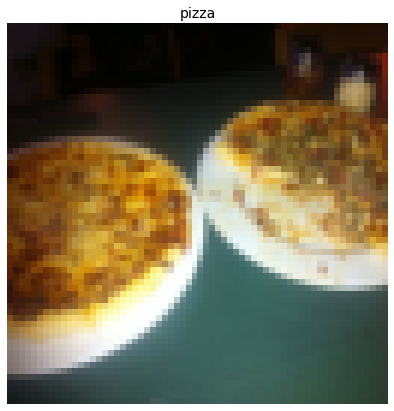

In [161]:
# Rearange the order od dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> color channels, height, width")
print(f"Image permute: {img_permute.shape} -> height, width, color_channels")

# Plote the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [162]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [163]:
# Turn train and test datasets into dataloaders
import os
from torch.utils.data import DataLoader

os.cpu_count()

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7ed5f42350>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7ed5f42890>)

In [164]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [165]:
len(train_data), len(test_data)

(225, 75)

In [166]:
225 / 32

7.03125

In [167]:
img, label = next(iter(train_dataloader))

# Print batch size, now it will be 1, you can change the bathsize to anything you want
print(f"Image shape: {img.shape} -> bath_size, color channels, height, width")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> bath_size, color channels, height, width
Label shape: torch.Size([1])


In [168]:
# Option 2, loading image data with a custom dataset
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [169]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [170]:
# Creating a helper function to get class names
# Setup the path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [171]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'pizza'>, <DirEntry 'sushi'>]

In [172]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Find the class folder names in a target direcotyr"""
  # Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Raise an erro if class names cannot be find
  if not classes:
    return FileNotFoundError(f"Could not find any classes in directory: {directory}... please check the file structure")

  # Create a dic of idexed labels
  # Map a class to integrer, go throug this and map to index, 1 pizza and tt
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [173]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [174]:
# Create a custom dataset to replicate ImageFolder
from torch.utils.data import Dataset

# Subsclass torch utils data.Dataset
class ImageFolderCustom(Dataset):
  # Initialize the custom dataset
  def __init__(self, targ_dir: str, transform=None):
    # Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # transforms setup
    self.transform = transform
    # Creating a classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # Create a function to load an image
  def load_image(self, index: int) -> Image.Image:
    """Opens the image via path and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)

  # Overwrite the len __len__()
  def __len__(self) -> int:
    """Returns the total number of samples"""
    # We will return number of image paths
    # And same for test dir
    return len(self.paths)

  # Overwrite the __getItem()__ method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label X and y"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name #expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if neccesary
    if self.transform:
      return self.transform(img), class_idx # return data label X, y
    else:
      return img, class_idx # return untransformed image and label


In [175]:
img, label = train_data[0]

In [176]:
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [177]:
# Creating a transform
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64, 64)), transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)), transforms.ToTensor()])

In [178]:
# Test out image folder custom
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [179]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f7ed5f88550>,
 <__main__.ImageFolderCustom at 0x7f7ed5f88f90>)

In [180]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [181]:
len(train_data), len(train_data_custom)

(225, 225)

In [182]:
len(test_data), len(test_data_custom)

(75, 75)

In [183]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [184]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [185]:
# Check for a equality between original ImageFolder and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [186]:
# Create a function to display random images
# Take in dataset and a number of other params such as class names and how to visualize the images

In [187]:
# Create a function to take in dataset
def display_random_images(dataset: torch.utils.data.Dataset, classes: List[str] = None, n: int = 10, display_shape: bool = True, seed: int = None):
  # Adjust display if n is to high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n should not be larger than 10, setting to 10 and removing shape display.")
  
  # Set the random seed
  if seed:
    random.seed(42)

# 10 random index
  # Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # Setup plot
  plt.figure(figsize=(16, 8))

  # Loop through the indexes, and plot them with mat plot lib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    # Adjust the tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # color channels, height, width => height, width, coloe channels

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

In [188]:
random.sample(range(len(train_data_custom)), k=10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

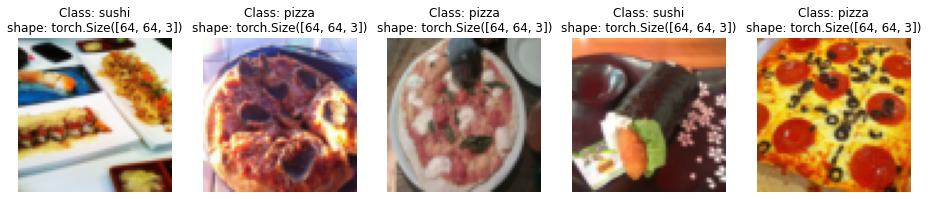

In [189]:
#  From ImageFoler
display_random_images(train_data, n=5, classes=class_names, seed=42)

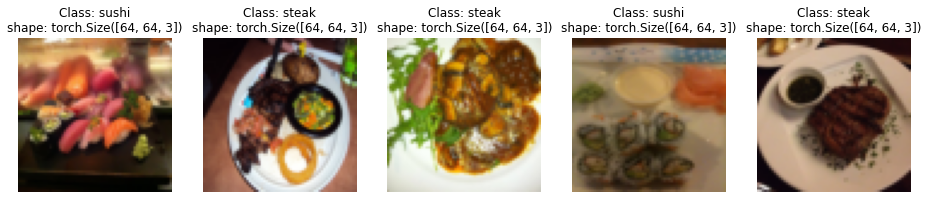

In [190]:
# Display random images from the ImageFolderCustomDataset
display_random_images(train_data_custom, n=5, classes=class_names, seed=42)

In [191]:
# Turn custom loaded images into dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f7ed6095050>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7ed608e090>)

In [192]:
# Get image and label from custom data loader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [193]:
# Other forms of transforms (data augmentation)
# it is a process of artificially adding diversity to my training data, in the image data, this would mean applying
# varios image transformations to the training images
# This practice results in the model which is more generizable to unseen data, it lets the computer to look at the data from different perspective

In [194]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [195]:
# Looking at triavial augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

In [196]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/339891.jpg')]

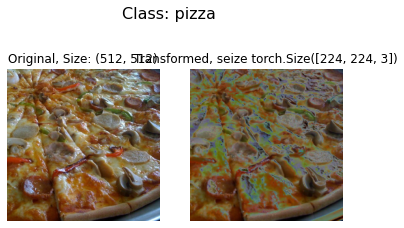

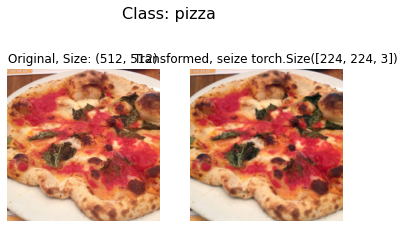

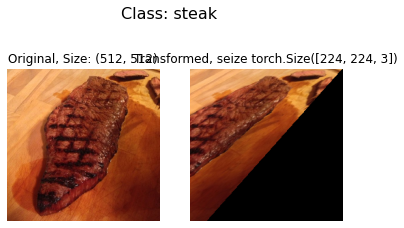

In [197]:
from torch._C import NoneType
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [198]:
# Model: 0 TinyVGG without data augentation
# Create transforms and load data

# Create a simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [199]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# Turn the datasets in to dataloaders
import os
from torch.utils.data import DataLoader

# Setup the batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [200]:
NUM_WORKERS

2

In [201]:
class TinyVGG(nn.Module):
    """
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [202]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(class_names)
                  ).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [203]:
# Try a forward pass on one input image
# Get a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [204]:
# Try a forwrd pass
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0352],
        [0.0658, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0375],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0348],
        [0.0620, 0.0599, 0.0370],
        [0.0607, 0.0628, 0.0387],
        [0.0637, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0690, 0.0330],
        [0.0557, 0.0570, 0.0357],
        [0.0631, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0369],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0638, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [205]:
10 * 16 * 16

2560

In [206]:
# INstall torchinfo here, and then import it if there
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [207]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [208]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [209]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [210]:
# Train and evaluate the model
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Recreate the instance of tinyVGG
model_0 = TinyVGG(input_shape=3, # number of color in the images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0, train_dataloader=train_dataloader_simple, test_dataloader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS)

# End timer and print out the how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1360 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0847 | train_acc: 0.4258 | test_loss: 1.1620 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1157 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0955 | train_acc: 0.4141 | test_loss: 1.1385 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0982 | train_acc: 0.2930 | test_loss: 1.1432 | test_acc: 0.1979
Total training time: 8.092 seconds


In [211]:
model_0_results

{'train_loss': [1.1078302264213562,
  1.084670826792717,
  1.115685522556305,
  1.095502570271492,
  1.0981803238391876],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.4140625, 0.29296875],
 'test_loss': [1.1360186735788982,
  1.1620242198308308,
  1.169498324394226,
  1.1384557088216145,
  1.1431543032328289],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

In [212]:
# Plotting the loss curves of model_0
# A loss curve is a way of tracking the model progress during the time

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [213]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """ PLots the training curves of a results dictionary"""
  # Get the loss values of the results dictionary
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy vvalues of the results dictionary (training and test)
  accuracy = results["train_loss"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup the plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # PLot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

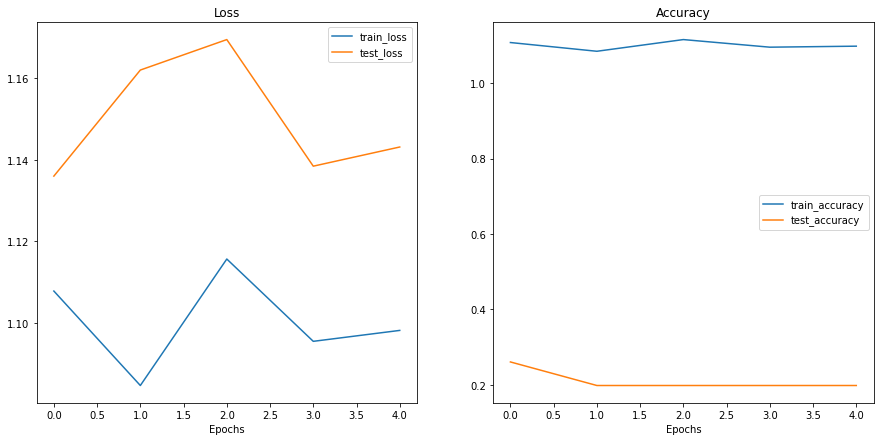

In [214]:
plot_loss_curves(model_0_results)

In [215]:
# Create a training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [216]:
# Create a train and test DataSets
# Turn image folders into datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [217]:
# Train datasets to dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [218]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=(len(train_data_augmented.classes))).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [220]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1060 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0792 | train_acc: 0.4258 | test_loss: 1.1385 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0812 | train_acc: 0.4258 | test_loss: 1.1694 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1291 | train_acc: 0.3047 | test_loss: 1.1627 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0901 | train_acc: 0.4258 | test_loss: 1.1481 | test_acc: 0.2604
Total training time: 8.765 seconds


In [221]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [222]:
model_1_results

{'train_loss': [1.1075736582279205,
  1.0791547670960426,
  1.081241823732853,
  1.1291499137878418,
  1.090115912258625],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1059683958689372,
  1.1385323007901509,
  1.169406255086263,
  1.162692944208781,
  1.148114283879598],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

In [223]:
# Plotting the loss curves of model 1
# It helps evaluate the mode poerfoamce

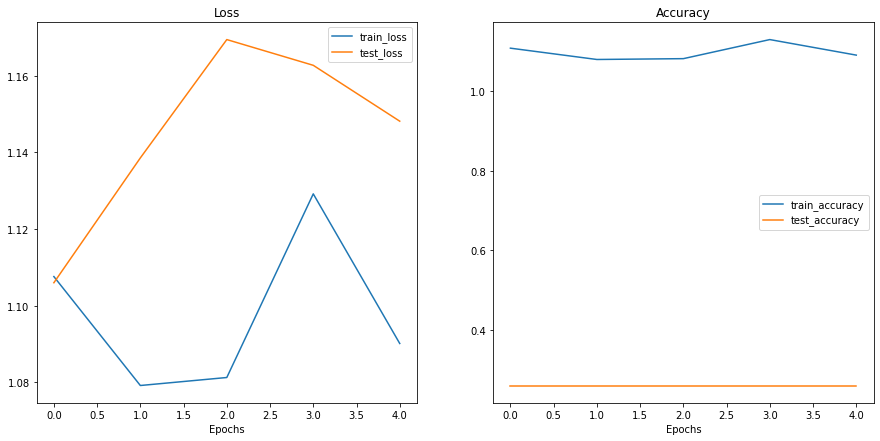

In [224]:
plot_loss_curves(model_1_results)

In [225]:
# Compoare the model results
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107830,0.257812,1.136019,0.260417
1,1.084671,0.425781,1.162024,0.197917
2,1.115686,0.292969,1.169498,0.197917
3,1.095503,0.414062,1.138456,0.197917
4,1.098180,0.292969,1.143154,0.197917


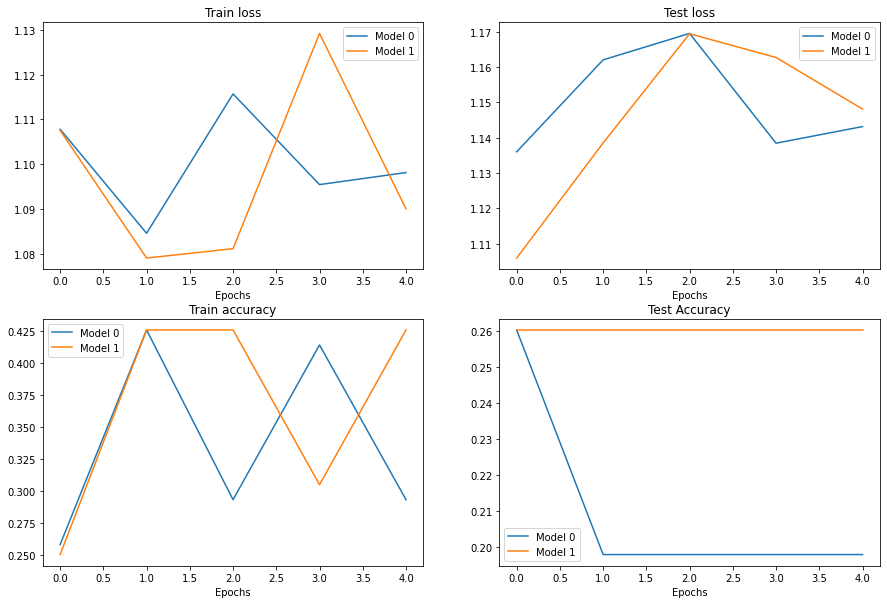

In [227]:
# Setup the plot to model_0 and model_1 results
# Setup the plot here
plt.figure(figsize=(15, 10))

# Get a number of epochs
epochs = range(len(model_0_df))

# Create a plot for the train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# Create a plot for the test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# Create a plot for the train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [231]:
# Making a prediction with custom image
# Downloading the custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpg"

# Download the image if it does not exists yet
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading: {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")


data/04-pizza-dad.jpg already exists, skipping download...


In [235]:
custom_image_path

PosixPath('data/04-pizza-dad.jpg')

In [236]:
import torchvision
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom iamge tensor: tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
CUstom image datat

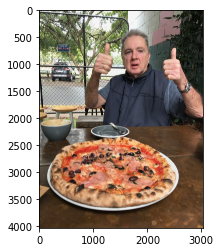

In [238]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
print(f"Custom iamge tensor: {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"CUstom image datatype: {custom_image_uint8.dtype}")